In this small project I tried to do a Portfolio Optimization with a small twist which will actually take a lot more time to calculate an optimal portfolio! Normally in an Portfolio Optimization we have a fixed amount of assets we want in our portfolio and then create an efficient Frontier where we will plot like 1000 random weighted portfolios and allocate the portfolio with the highest sharpe ratio!
I wanted to try something here by using a universe of different assets where 3 assets will be randomly picked.
With this method we are not limited by one combination of assets. Here we have thousands of different portfolios with different assets and different weights, which will give us one portfolio of our universe of assets with the highest sharpe ratio!

In [9]:
#First we need to import some libraries which we will need 
import numpy as np
import pandas as pd
import random
import pandas_datareader as web
import matplotlib.pyplot as plt

In [2]:
#Now we set a start and end date
start = "2018-01-01"
end = "2020-01-01"

In [4]:
#For the assets I have choosen Mega Market Cap companys (>$200B) traded on the NASDAQ which you can 
#find on the nasdaq stocks screener
assets = ["AAPL", "MFST", "AMZN", "GOOG", "GOOGL", "TSLA", "FB", "NVDA", "PYPL", "INTC", "ASML", "CMCSA", "ADBE", "NFLX", "PDD"]

In [5]:
#Getting the data from yahoo finance and put it into a dataframe 
#you can use any other provider if you want I use yahoo finance here because its the most comfortable for me
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source="yahoo", start =start, end = end)["Adj Close"]
    
df

,AAPL,MFST,AMZN,GOOG,GOOGL,TSLA,FB,NVDA,PYPL,INTC,ASML,CMCSA,ADBE,NFLX,PDD
Date,,,,,,,,,,,,,,,
2018-01-02,41.442081,0.60000,1189.010010,1065.000000,1073.209961,64.106003,181.419998,197.695740,73.839996,43.505844,171.838104,38.525433,177.699997,201.070007,NaN
2018-01-03,41.434864,0.70000,1204.199951,1082.479980,1091.520020,63.450001,184.669998,210.706848,76.750000,42.029343,173.143341,37.906330,181.039993,205.050003,NaN
2018-01-04,41.627323,0.60000,1209.589966,1086.400024,1095.760010,62.924000,184.330002,211.817535,76.730003,41.258583,174.757980,38.150223,183.220001,205.630005,NaN
2018-01-05,42.101261,0.70000,1229.140015,1102.229980,1110.290039,63.316002,186.850006,213.612518,78.699997,41.546459,176.807693,38.497295,185.339996,209.990005,NaN
2018-01-08,41.944889,0.60000,1246.869995,1106.939941,1114.209961,67.281998,188.279999,220.157761,79.050003,41.546459,177.735886,37.971992,185.039993,212.050003,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,70.459007,0.00110,1789.209961,1343.560059,1344.430054,85.050003,205.119995,238.226913,108.690002,57.968597,292.310028,43.355247,329.640015,333.200012,38.040001
2019-12-26,71.856941,0.00095,1868.770020,1360.400024,1362.469971,86.188004,207.789993,238.795975,109.750000,58.368649,293.707520,43.783646,331.200012,332.630005,38.570000
2019-12-27,71.829674,0.00080,1869.800049,1351.890015,1354.640015,86.075996,208.100006,236.479767,109.400002,58.622341,294.034607,43.910213,330.790009,329.089996,39.240002


Now that we have all the historical data we need we can start creating our randomly picked and weighted portfolios and try to build an Efficient Frontier for all the portfolios.
Since we have a universe of 15 different assets, and lets say we want portfolios with 3 assets there are 15!/(15-3)! = 2730 different combinations of portfolios which can then be randomly weighted so we will need a lot of them!
I first playaround with 50.000 portfolios and it already took like 5-8 minutes to calculate but you can play around with bigger numbers if you like

In [6]:
#Creating some empty lists and setting the number of assets we want in a portfolio with also a risk free rate
portfolio_returns = []
portfolio_volatility = []
portfolio_sharperatio = []
p_weightsorder = []
position = []

rf = 0.025
num_assets = 3
num_portfolios = 50000

In [10]:
#Generating 50000 portfolios with different assets ans random weights
for portfolio in range(num_portfolios):
    assetsinportfolio = random.choices(assets, k=num_assets)
    while len(assetsinportfolio) != len(set(assetsinportfolio)):
        assetsinportfolio = random.choices(assets, k=num_assets)
    weights = np.random.random([len(assetsinportfolio)])
    weights = weights/np.sum(weights)
    p_weights = (np.zeros(len(assets)))
    position.clear()
    for a in range(len(assetsinportfolio)):
        if assetsinportfolio[a] in assets:
            temp = assets.index(assetsinportfolio[a])
            position.append(temp)
    for p,w in zip(position,weights):
          p_weights[p] = weights[position.index(p)]
    p_weightsorder.append(np.asarray(p_weights))
    returns = np.dot(weights, df[assetsinportfolio].resample("Y").last().pct_change().mean())
    portfolio_returns.append(returns)
    var = df[assetsinportfolio].pct_change().apply(lambda x: np.log(1+x)).cov().mul(weights, axis = 0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(252)
    portfolio_volatility.append(ann_sd)
    sharpe = ((returns - rf)/ann_sd)
    portfolio_sharperatio.append(sharpe)

In [11]:
#Preparing some columns with values for the final dataframe 
data = {"Returns": portfolio_returns, "Volatility": portfolio_volatility, "Sharpe ratio": portfolio_sharperatio}

In [14]:
#adding all the columns together to have a dataframe with 50000 different portfolios
for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol] = [w[counter] for w in p_weightsorder]

In [13]:
#Putting the generated Portfolios in a new Dataframe
portfolios = pd.DataFrame(data)
portfolios

,Returns,Volatility,Sharpe ratio,AAPL,MFST,AMZN,GOOG,GOOGL,TSLA,FB,NVDA,PYPL,INTC,ASML,CMCSA,ADBE,NFLX,PDD
0,0.798932,0.262002,2.953919,0.804776,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.169710,0.025514,0.00000
1,0.818639,0.258448,3.070788,0.753000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.075263,0.000000,0.171738,0.000000,0.00000
2,0.504192,0.217456,2.203628,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.207455,0.443380,0.349165,0.000000,0.00000
3,0.327569,0.251517,1.202973,0.000000,0.0,0.077559,0.000000,0.639531,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.282910,0.000000,0.00000
4,0.373927,0.263865,1.322366,0.026605,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.632843,0.000000,0.000000,0.340552,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.534787,0.217851,2.340077,0.000000,0.0,0.000000,0.282631,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.351963,0.365406,0.000000,0.000000,0.00000
49996,0.271407,0.369385,0.667073,0.000000,0.0,0.000000,0.000000,0.000000,0.579854,0.0,0.000000,0.381846,0.000000,0.000000,0.038300,0.000000,0.000000,0.00000
49997,0.471099,0.295899,1.507604,0.000000,0.0,0.000000,0.368138,0.000000,0.000000,0.0,0.378855,0.253008,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
49998,0.240662,0.325606,0.662340,0.000000,0.0,0.000000,0.000000,0.226289,0.317685,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456026,0.00000


Above we can see the 50000 portfolios which have randomly picked assets and randomly generated weights. 
Now we can plot our colums return, volatility and sharpe ratio to see if it still looks like an Efficient Frontier!

Text(0, 0.5, 'Returns')

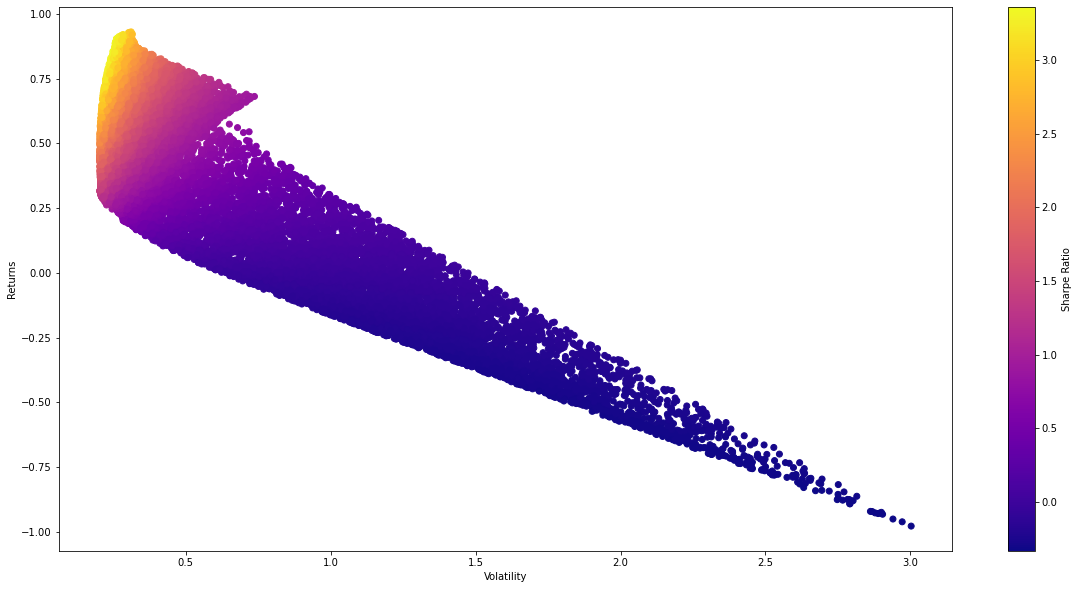

In [15]:
plt.subplots(figsize=(20,10))
plt.scatter(portfolios["Volatility"], portfolios["Returns"], c= portfolios["Sharpe ratio"], cmap = "plasma")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Returns")

Well yeah it doesnt really look like one but we can still allocate some efficient portfolios like the highest sharpe ratio or lowest volatility portfolio and see what our random picked assets are and their random generated weights.

In [17]:
portfolios.loc[portfolios["Sharpe ratio"].argmax()]

Returns         0.904033
Volatility      0.261489
Sharpe ratio    3.361642
AAPL            0.644271
MFST            0.000000
AMZN            0.000000
GOOG            0.000000
GOOGL           0.000000
TSLA            0.001100
FB              0.000000
NVDA            0.000000
PYPL            0.000000
INTC            0.000000
ASML            0.354629
CMCSA           0.000000
ADBE            0.000000
NFLX            0.000000
PDD             0.000000
Name: 21866, dtype: float64

In [18]:
portfolios.loc[portfolios["Returns"].argmax()]

Returns         0.930292
Volatility      0.311611
Sharpe ratio    2.905196
AAPL            0.041584
MFST            0.000000
AMZN            0.000000
GOOG            0.000000
GOOGL           0.000000
TSLA            0.000000
FB              0.000000
NVDA            0.001420
PYPL            0.000000
INTC            0.000000
ASML            0.956996
CMCSA           0.000000
ADBE            0.000000
NFLX            0.000000
PDD             0.000000
Name: 31395, dtype: float64

In [20]:
portfolios.loc[portfolios["Volatility"].argmin()]

Returns         0.441698
Volatility      0.202504
Sharpe ratio    2.057727
AAPL            0.218059
MFST            0.000000
AMZN            0.000000
GOOG            0.000000
GOOGL           0.314936
TSLA            0.000000
FB              0.000000
NVDA            0.000000
PYPL            0.000000
INTC            0.000000
ASML            0.000000
CMCSA           0.467005
ADBE            0.000000
NFLX            0.000000
PDD             0.000000
Name: 31174, dtype: float64